# Exploration de données

## Import des libs

### Téléchargement des libs si nécessaire

In [1]:
!pip3 install venn
!mkdir data
!mkdir data/DATABASE_Password
!wget https://github.com/danielmiessler/SecLists/raw/master/Passwords/Leaked-Databases/Ashley-Madison.txt
!mv Ashley-Madison.txt data/DATABASE_Password

  Created wheel for venn: filename=venn-0.1.3-cp36-none-any.whl size=19701 sha256=166b0e1123baa76574243ce002f8ba8723605a24d3368ed67ffd96afa42b23a9
  Stored in directory: /root/.cache/pip/wheels/41/e4/83/4269e8fb3c81b09363ebe355c373b14b0b947394d2af541734
Successfully built venn
--2021-01-06 12:17:49--  https://github.com/danielmiessler/SecLists/raw/master/Passwords/Leaked-Databases/Ashley-Madison.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Leaked-Databases/Ashley-Madison.txt [following]
--2021-01-06 12:17:50--  https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Leaked-Databases/Ashley-Madison.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com

In [6]:
import sys
import matplotlib.pylab as plt
import string
import re
import itertools
from venn import venn
import numpy as np
import math 
import collections


### Constantes

In [34]:
# Données d'entrainement
current_file = "data/DATABASE_Password/Ashley-Madison.txt"

# Données de test
#current_file = "data/DATABASE_Password/hak_2352_clear.txt"

# Données générées par le GRU
#current_file = "generated_pwd.txt"

## Data Exploration

### Lecture du fichier Ashley Madison

In [35]:
passwords = []
with open(current_file) as data_file:
    for line in data_file:
        passwords.append(str(line.replace("\n", "")))

len_pwd_totale = len(passwords)
print("Taille totale des passwords: ", len_pwd_totale)
print("password le plus grand: ", max([len(i) for i in passwords]))

# Pour l'entrainement les données sont triées 
# Pas de caractères spéciaux ni de mdp de + 10 caractères
regex_special_char = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
passwords = [mdp for mdp in passwords if len(mdp) >= 4 and len(mdp) <= 10 and regex_special_char.search(mdp) == None]

print("Pourcentage des mdp conservés (-10 caractères et sans caractères spéciaux):", len(passwords)/len_pwd_totale * 100)

text = "\n".join(passwords)

print(len(text))

passwords.sort(key=len)

Taille totale des passwords:  375853
password le plus grand:  110
Pourcentage des mdp conservés (-10 caractères et sans caractères spéciaux): 94.90705142702068
2998568


In [36]:
# Création d'un dictionnaire de densité
# key : len(password)
# value : nombre de pwd
density_dic = {}
for password in passwords:
    if not len(password) in density_dic:
        density_dic[len(password)] = 1
    else: 
        density_dic[len(password)] += 1


In [37]:
password_type_dic = {}
password_type_dic["alpha_min"] = set()
password_type_dic["alpha_maj"] = set()
password_type_dic["alpha"] = set()
password_type_dic["numeric"] = set()
password_type_dic["special_char"] = set()
for password in passwords:
    
    regex_special_char = re.compile('[@_!#$%^&*()<>?/\|}{~:]')

    regex_numeric = re.compile('[0-9]') 
    regex_alpha_min = re.compile('[a-z]')
    regex_alpha_maj = re.compile('[A-Z]')
    
    if not (regex_special_char.search(password) == None): 
        password_type_dic["special_char"].add(password)
        
    if not (regex_numeric.search(password) == None): 
        password_type_dic["numeric"].add(password)
            
    if not (regex_alpha_min.search(password) == None): 
        password_type_dic["alpha_min"].add(password)

    if not (regex_alpha_maj.search(password) == None): 
        password_type_dic["alpha_maj"].add(password)

password_type_dic["alpha"] = password_type_dic["alpha_min"].union(password_type_dic["alpha_maj"])

### Données sur le dataset

In [25]:
print ("Taille totale des données brutes :", len(passwords))
print ("Taille totale des données uniques :", len(set(passwords)))
print ("Nombre de pwd redondants :", len(passwords) - len(set(passwords)))
# Le dataset est donc trié
print("Password le plus grand du dataset : ", len(max(passwords, key=len)))
print(max(passwords, key=len))
print("Password le plus petit du dataset : ", len(min(passwords, key=len)))
print("Moyenne de taille des passwords : ", round(len(''.join(passwords))/len(passwords),3))
print("Médiane de taille des passwords : ", len(sorted(passwords, key=len)[round(len(passwords)/2)]))
print("\n\t\tEnsembles :")
print("Nombre de pwd contenant au moins une lettre :\t\t", len(password_type_dic["alpha"]))
print("Nombre de pwd contenant au moins une lettre minuscule :\t\t", len(password_type_dic["alpha_min"]))
print("Nombre de pwd contenant au moins une lettre majuscule :\t\t", len(password_type_dic["alpha_maj"]))
print("Nombre de pwd contenant au moins un chiffre :\t\t", len(password_type_dic["numeric"]))
print("Nombre de pwd contenant au moins un caractère spécial :\t", len(password_type_dic["special_char"]))
print("_"*23, " Combinaisons ","_"*23)
print("Nombre de pwd contenant au moins une lettre et un chiffre:\t", len(set.intersection(password_type_dic["alpha"], password_type_dic["numeric"])))
print("Nombre de pwd contenant au moins une lettre et un caractère spécial:\t", len(set.intersection(password_type_dic["alpha"], password_type_dic["special_char"])))
print("Nombre de pwd contenant au moins un chiffre et un caractère spécial:\t", len(set.intersection(password_type_dic["numeric"], password_type_dic["special_char"])))
print("Nombre de pwd contenant au moins une lettre, un caractère spécial et un chiffre:\t", len(set.intersection(password_type_dic["alpha"], password_type_dic["numeric"], password_type_dic["special_char"])))
print("Nombre de pwd contenant une lettre et/ou un caractère spécial et/ou un chiffre:\t", len(set.union(password_type_dic["alpha"], password_type_dic["special_char"], password_type_dic["numeric"])))
print("Nombre de pwd contenant uniquement des lettres :\t", len(password_type_dic["alpha"] - set.union(password_type_dic["special_char"], password_type_dic["numeric"])))
print("Nombre de pwd contenant uniquement des chiffres :\t", len(password_type_dic["numeric"] - set.union(password_type_dic["alpha"], password_type_dic["special_char"])))
print("Nombre de pwd contenant uniquement des caractères spéciaux :\t", len(password_type_dic["special_char"] - set.union(password_type_dic["alpha"], password_type_dic["numeric"])))

print("Nombre de pwd contenant uniquement des majuscules :\t", len(password_type_dic["alpha_maj"] - set.union(password_type_dic["alpha"], password_type_dic["special_char"], password_type_dic["numeric"])))
print("\n")

Taille totale des données brutes : 3296625
Taille totale des données uniques : 1258396
Nombre de pwd redondants : 2038229
Password le plus grand du dataset :  10
sococo1963
Password le plus petit du dataset :  4
Moyenne de taille des passwords :  6.355
Médiane de taille des passwords :  6

		Ensembles :
Nombre de pwd contenant au moins une lettre :		 829342
Nombre de pwd contenant au moins une lettre minuscule :		 824244
Nombre de pwd contenant au moins une lettre majuscule :		 17341
Nombre de pwd contenant au moins un chiffre :		 704996
Nombre de pwd contenant au moins un caractère spécial :	 0
_______________________  Combinaisons  _______________________
Nombre de pwd contenant au moins une lettre et un chiffre:	 275942
Nombre de pwd contenant au moins une lettre et un caractère spécial:	 0
Nombre de pwd contenant au moins un chiffre et un caractère spécial:	 0
Nombre de pwd contenant au moins une lettre, un caractère spécial et un chiffre:	 0
Nombre de pwd contenant une lettre et/o

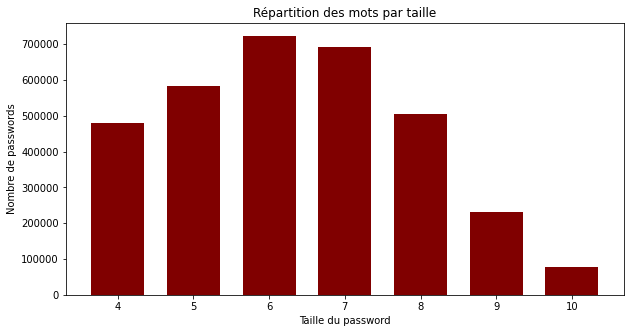

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(density_dic.keys(), density_dic.values(), color ='maroon',  
        width = 0.7) 

plt.xlabel('Taille du password',fontsize=10)
plt.ylabel('Nombre de passwords',fontsize=10)
plt.title('Répartition des mots par taille');
plt.savefig("generated_tailledesmdp.png")


<AxesSubplot:>

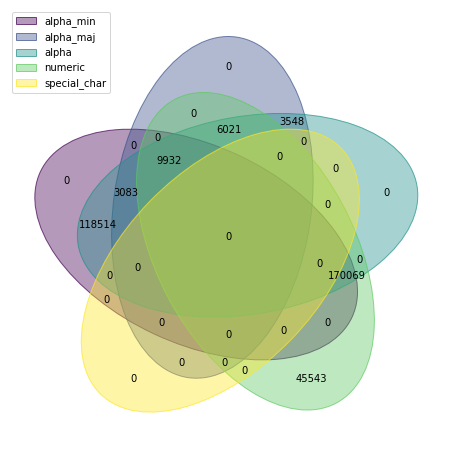

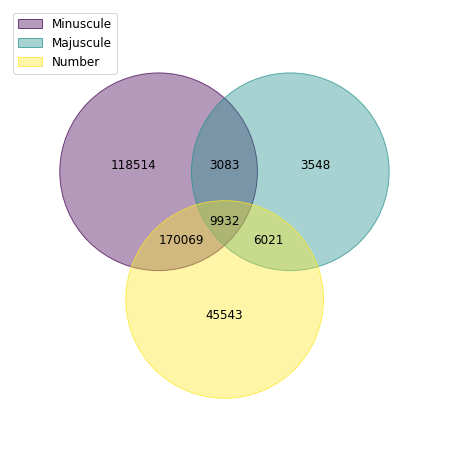

In [39]:
venn(password_type_dic, fontsize=10, legend_loc="upper left")

venn({"Minuscule" : password_type_dic["alpha_min"],"Majuscule": password_type_dic["alpha_maj"], "Number": password_type_dic["numeric"]}, fontsize=12, legend_loc="upper left")


#### Etude des caractères

In [28]:
all_char = set("".join(passwords))
print(len(all_char))
density_char = {}

for char in "".join(passwords):
    if char in density_char:
        density_char[char] += 1
    else:
        density_char[char] = 1

for key in density_char:
    density_char[key] = math.log(density_char[key])

density_char = collections.OrderedDict(sorted(density_char.items()))

67


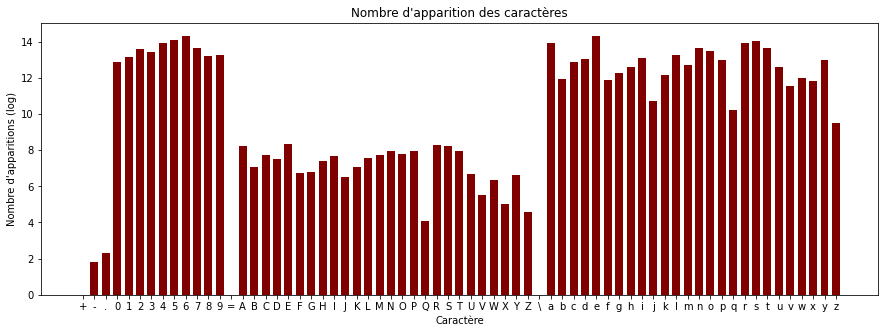

In [29]:
fig = plt.figure(figsize = (15, 5)) 
  
# creating the bar plot 
plt.bar(density_char.keys(), density_char.values(), color ='maroon',  
        width = 0.7) 

plt.xlabel('Caractère',fontsize=10)
plt.ylabel('Nombre d\'apparitions (log)',fontsize=10)
plt.title('Nombre d\'apparition des caractères');

In [31]:
cooccurence_matrix = np.zeros((len(all_char),len(all_char)))
all_char = sorted(all_char)
print(all_char)
for pwd in passwords:
    for p_char1 in pwd:
        for p_char2 in pwd:
            if p_char1 != p_char2:
                cooccurence_matrix[all_char.index(p_char1)][all_char.index(p_char2)] += 1
            else:
                cooccurence_matrix[all_char.index(p_char1)][all_char.index(p_char2)] = 0


['+', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


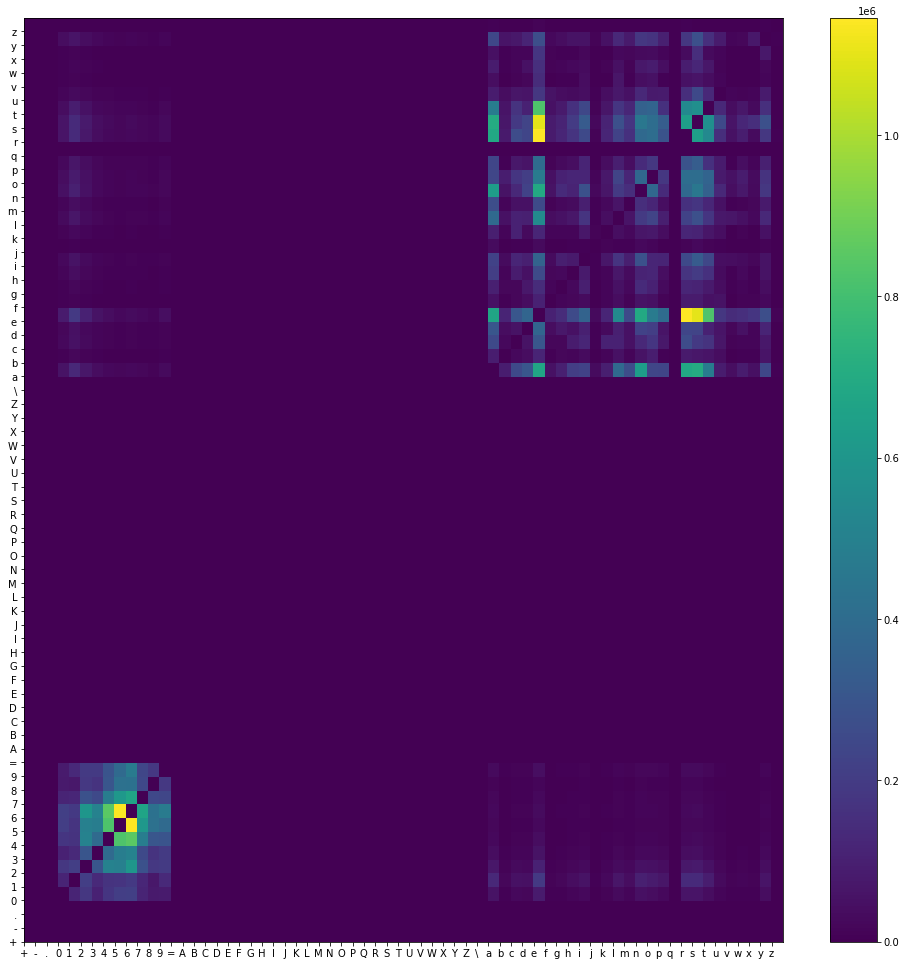

In [32]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(1,1,1)
plot = ax.pcolor(cooccurence_matrix)

ax.set_xticks(np.arange(len(all_char)))
ax.set_yticks(np.arange(len(all_char)))

ax.set_xticklabels(all_char)
ax.set_yticklabels(all_char)

fig.colorbar(plot);
plt.savefig("Generated_heatmap.png")

On ne voit pas bien les différences, normalisons la matrice

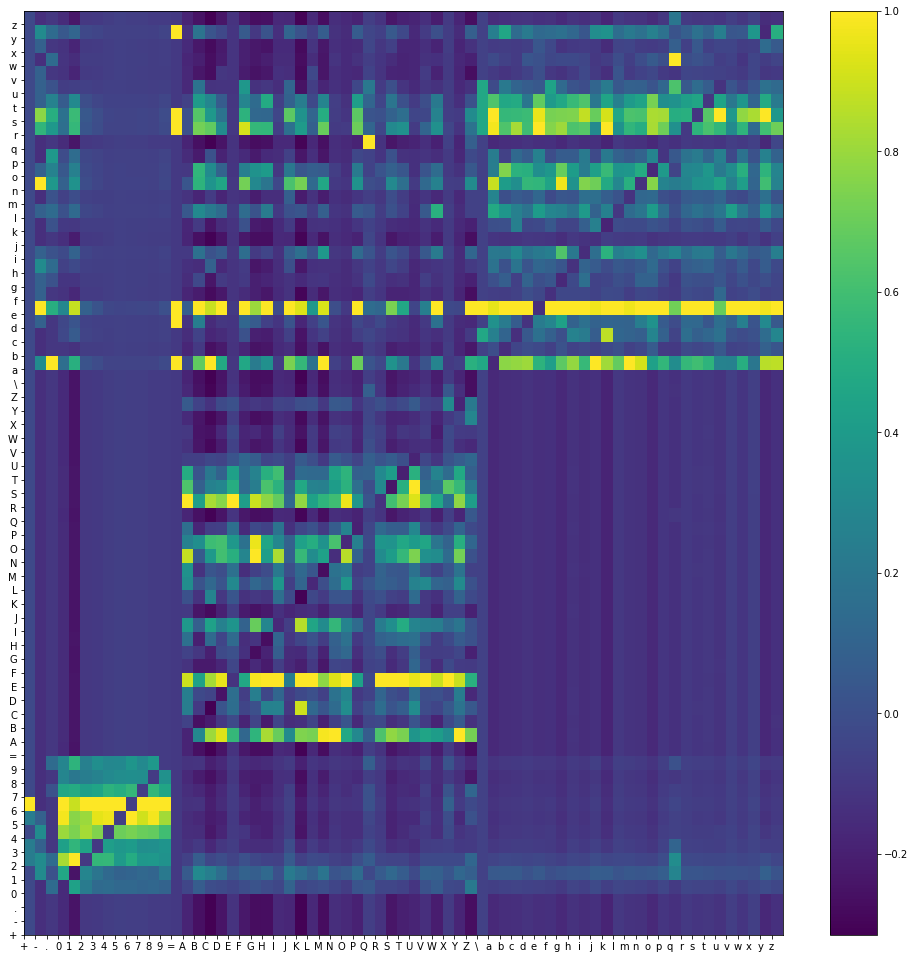

In [33]:
# Normalisation

normalized_cooccurence_matrix = cooccurence_matrix - cooccurence_matrix.mean(axis=0)
normalized_cooccurence_matrix = normalized_cooccurence_matrix / np.abs(normalized_cooccurence_matrix).max(axis=0)


fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(1,1,1)
plot = ax.pcolor(normalized_cooccurence_matrix)

ax.set_xticks(np.arange(len(all_char)))
ax.set_yticks(np.arange(len(all_char)))

ax.set_xticklabels(all_char)
ax.set_yticklabels(all_char)

fig.colorbar(plot);
plt.savefig("Generated_heatmap_normalized.png")